In [31]:
#I used below resources for some codes that I used in this page:
#https://www.kaggle.com/gpreda/santander-eda-and-prediction
#https://thispointer.com/python-pandas-count-number-of-nan-or-missing-values-in-dataframe-also-row-column-wise/
#https://towardsdatascience.com/exploratory-data-analysis-8fc1cb20fd15

In [90]:
import gc
import os
import logging
import datetime
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')

In [91]:
train=pd.read_csv("C:/Project/santander-customer-transaction-prediction/train.csv")


In [92]:
test=pd.read_csv("C:/Project/santander-customer-transaction-prediction/test.csv")

In [93]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [94]:
test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [95]:
#shape for train
train.shape

(200000, 202)

In [96]:
#shape for test
test.shape

(200000, 201)

In [97]:
#info for train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [98]:
#info for test
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


In [99]:
#Count all NaN in a train (both columns & Rows)
train.isnull().sum().sum()

0

In [100]:
#Count all NaN in a test (both columns & Rows)
test.isnull().sum().sum()

0

In [101]:
#describe:train
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [102]:
#describe:test
test.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


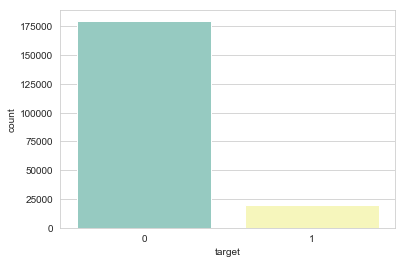

In [103]:
#distribution of target values
sns.countplot(train['target'], palette='Set3')

In [104]:
print("There are {}% of target values are 1".format(100 * train["target"].value_counts()[1]/train.shape[0]))

There are 10.049% of target values are 1


In [105]:
#density Plot for train
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(10,10,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(20,10,i)
        sns.distplot(df1[feature], hist=False,label=label1)
        sns.distplot(df2[feature], hist=False,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show();

<Figure size 432x288 with 0 Axes>

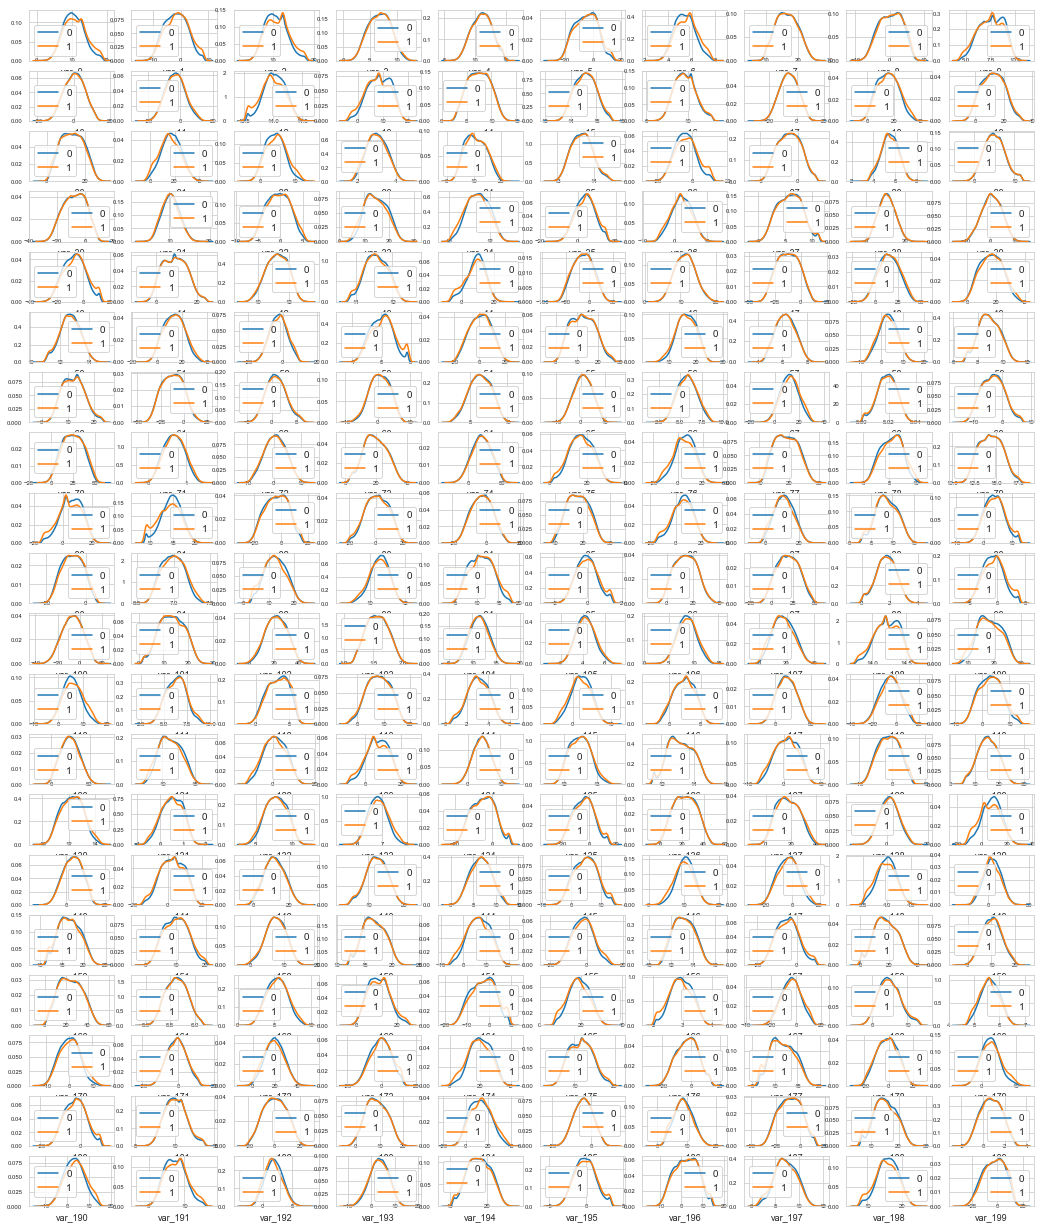

In [106]:
t0 = train.loc[train['target'] == 0]
t1 = train.loc[train['target'] == 1]
features = train.columns.values[2:202]
plot_feature_distribution(t0, t1, '0', '1', features)

<Figure size 432x288 with 0 Axes>

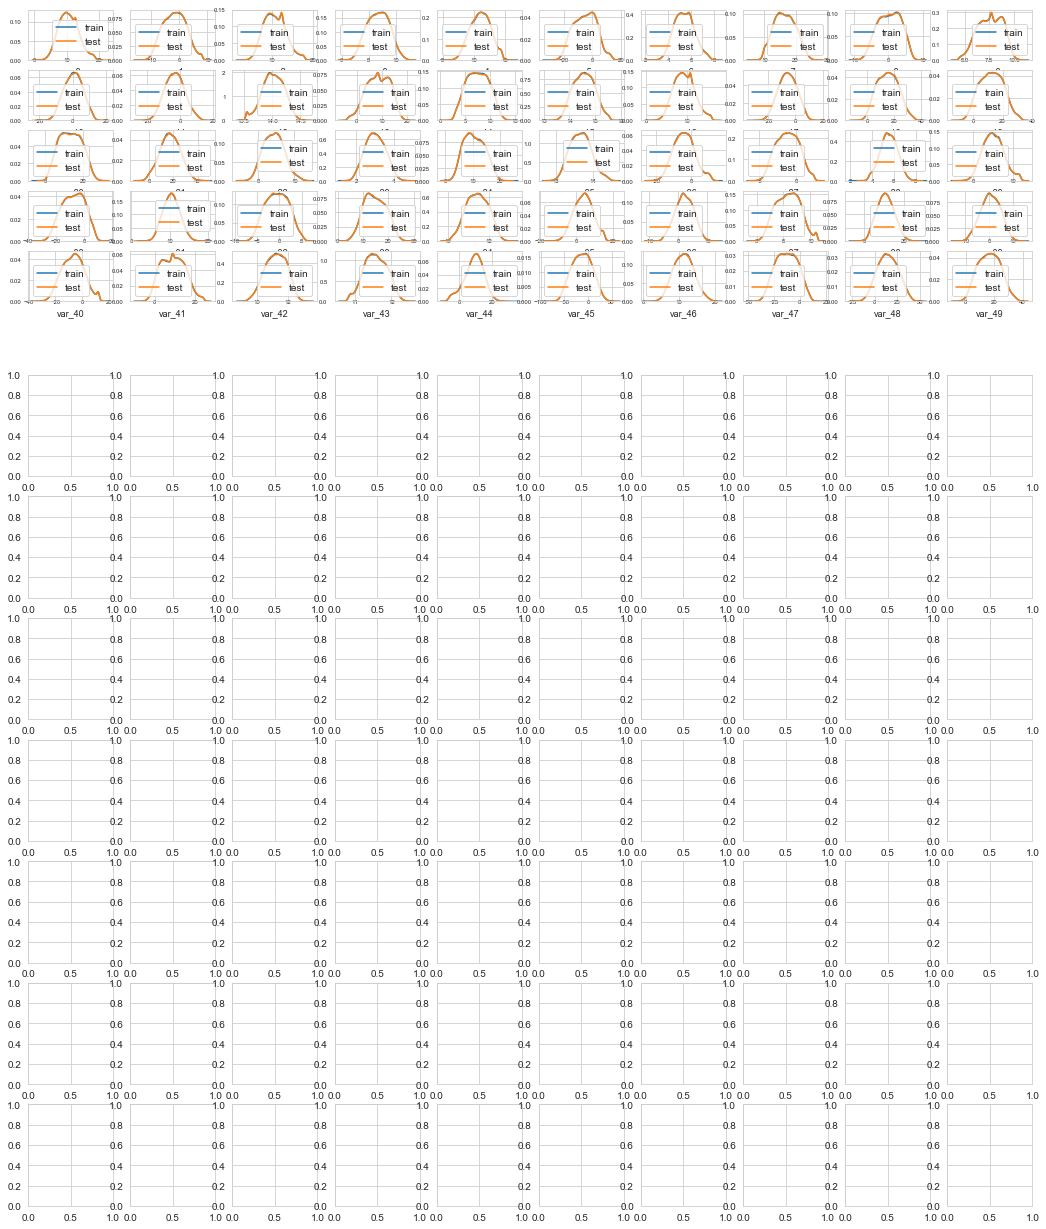

In [107]:
#check balance
features = train.columns.values[2:52]
plot_feature_distribution(train, test, 'train', 'test', features)

In [108]:
#Variables corrolations
#least
correlations = train[features].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
correlations.head(15)

,level_0,level_1,0
0,var_14,var_46,0.000009
1,var_46,var_14,0.000009
2,var_5,var_39,0.000010
3,var_39,var_5,0.000010
4,var_21,var_29,0.000010
5,var_29,var_21,0.000010
6,var_3,var_1,0.000010
7,var_1,var_3,0.000010
8,var_42,var_15,0.000013
9,var_15,var_42,0.000013


In [109]:
#most
correlations.tail(15)

,level_0,level_1,0
2435,var_21,var_2,0.006885
2436,var_32,var_12,0.006936
2437,var_12,var_32,0.006936
2438,var_0,var_6,0.006983
2439,var_6,var_0,0.006983
2440,var_26,var_33,0.006999
2441,var_33,var_26,0.006999
2442,var_23,var_13,0.007298
2443,var_13,var_23,0.007298
2444,var_44,var_13,0.007843


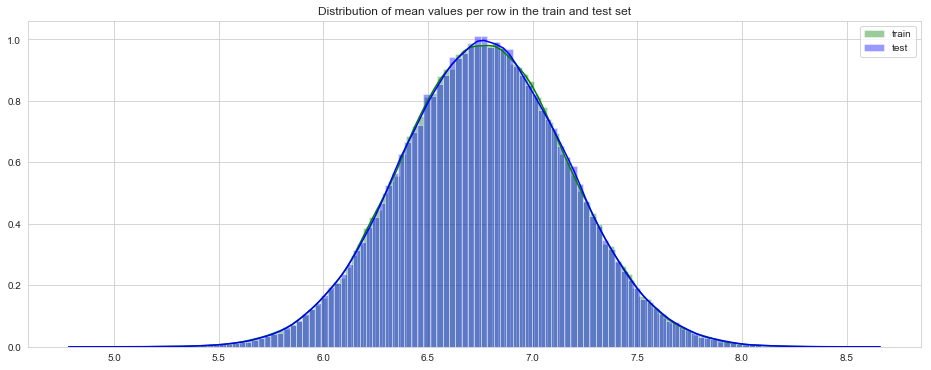

In [110]:
#Distribution of mean per row in train and test data set:
plt.figure(figsize=(16,6))
features = train.columns.values[2:202]
plt.title("Distribution of mean values per row in the train and test set")
sns.distplot(train[features].mean(axis=1),color="green", kde=True,bins=120, label='train')
sns.distplot(test[features].mean(axis=1),color="blue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

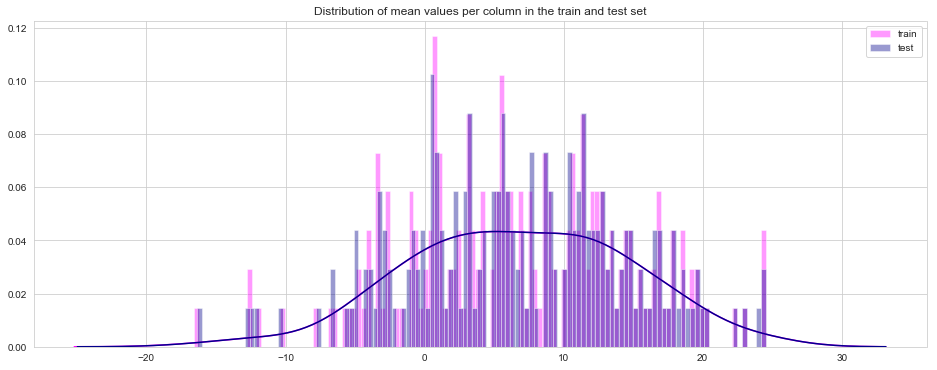

In [111]:
#Distribution of mean per column in train and test data set:
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per column in the train and test set")
sns.distplot(train[features].mean(axis=0),color="magenta",kde=True,bins=120, label='train')
sns.distplot(test[features].mean(axis=0),color="darkblue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

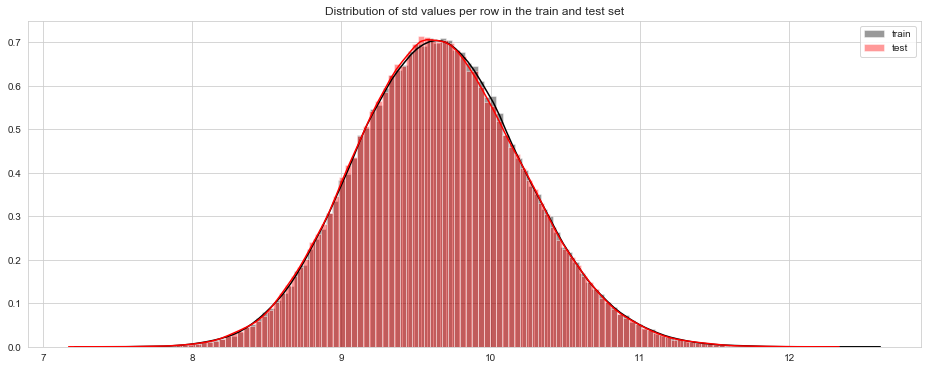

In [112]:
#Distribution of Standard Deviation of values per row in train and test data set:
plt.figure(figsize=(16,6))
plt.title("Distribution of std values per row in the train and test set")
sns.distplot(train[features].std(axis=1),color="black", kde=True,bins=120, label='train')
sns.distplot(test[features].std(axis=1),color="red", kde=True,bins=120, label='test')
plt.legend();plt.show()


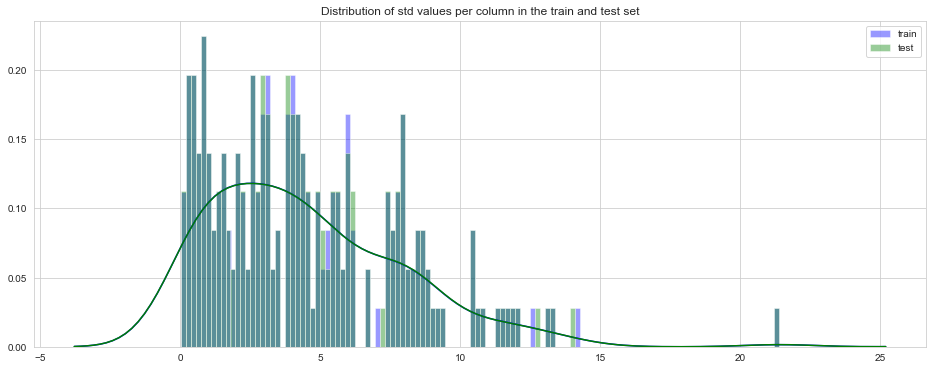

In [113]:
##Distribution of Standard Deviation of values per column in train and test data set:
plt.figure(figsize=(16,6))
plt.title("Distribution of std values per column in the train and test set")
sns.distplot(train[features].std(axis=0),color="blue",kde=True,bins=120, label='train')
sns.distplot(test[features].std(axis=0),color="green", kde=True,bins=120, label='test')
plt.legend(); plt.show()

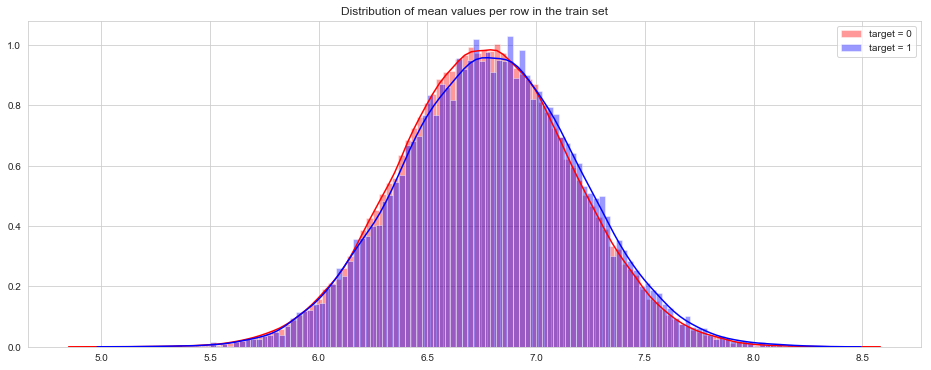

In [114]:
#Distribution of the mean value per row in the train dataset, grouped by value of target.
t0 = train.loc[train['target'] == 0]
t1 = train.loc[train['target'] == 1]
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per row in the train set")
sns.distplot(t0[features].mean(axis=1),color="red", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].mean(axis=1),color="blue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()

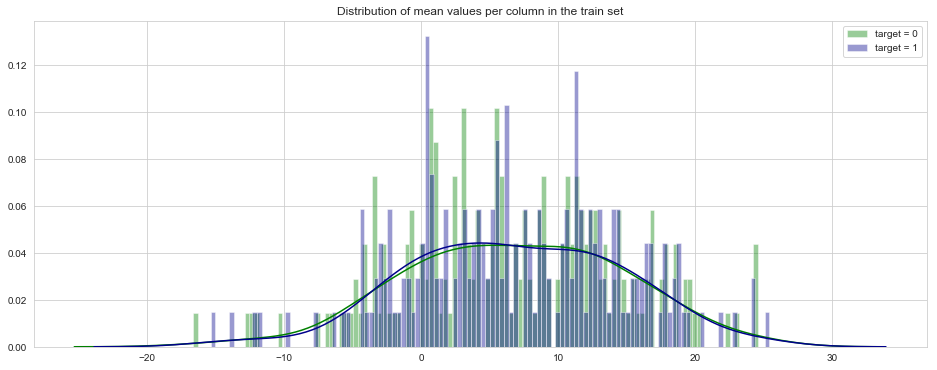

In [115]:
#Distribution of the mean value per column in the train dataset, grouped by value of target.
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per column in the train set")
sns.distplot(t0[features].mean(axis=0),color="green", kde=True,bins=120, label='target = 0')
sns.distplot(t1[features].mean(axis=0),color="darkblue", kde=True,bins=120, label='target = 1')
plt.legend(); plt.show()


In [116]:
#drop first column(ID-code) from train data set
train1=train.drop(["ID_code"], axis=1)

In [117]:
#normalize the data
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(train1)
trainNorm = pd.DataFrame(np_scaled)
trainNorm.head(15)

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,0.0,0.427853,0.324824,0.568059,0.388041,0.550670,0.467321,0.454298,0.594255,0.270395,...,0.569515,0.342943,0.568958,0.448173,0.510975,0.300318,0.678981,0.430958,0.327658,0.560645
1,0.0,0.557212,0.428639,0.681235,0.410417,0.628408,0.795072,0.536604,0.500584,0.660911,...,0.668079,0.536531,0.523717,0.756190,0.350211,0.765154,0.686614,0.468277,0.609546,0.605827
2,0.0,0.411969,0.483777,0.578061,0.599690,0.474941,0.471329,0.753295,0.414724,0.270429,...,0.522496,0.643141,0.448960,0.448000,0.671183,0.881350,0.236337,0.381950,0.425833,0.582736
3,0.0,0.535099,0.507140,0.396562,0.546993,0.647586,0.616822,0.572995,0.428577,0.224846,...,0.570474,0.383085,0.370986,0.439205,0.745555,0.418549,0.346810,0.717176,0.590016,0.443232
4,0.0,0.473637,0.533434,0.624133,0.504796,0.621079,0.702836,0.589011,0.622220,0.811883,...,0.387371,0.629275,0.299888,0.697737,0.238801,0.393218,0.557507,0.586526,0.591416,0.446041
5,0.0,0.555991,0.500594,0.608666,0.655146,0.507675,0.725165,0.358157,0.442026,0.682148,...,0.239333,0.478880,0.745336,0.406573,0.324980,0.660003,0.325396,0.630220,0.317577,0.506174
6,0.0,0.572710,0.588516,0.419607,0.327460,0.522627,0.492687,0.630909,0.301109,0.296629,...,0.703146,0.471131,0.601380,0.397839,0.501029,0.613128,0.716852,0.522153,0.231934,0.529194
7,0.0,0.660565,0.277547,0.682326,0.577443,0.308668,0.670363,0.547784,0.759844,0.753757,...,0.837989,0.476129,0.638877,0.585045,0.751066,0.512214,0.566455,0.573380,0.119470,0.628526
8,0.0,0.788618,0.687878,0.685407,0.428839,0.321353,0.777401,0.344912,0.216439,0.354232,...,0.477132,0.898728,0.446431,0.439096,0.319355,0.342672,0.403807,0.370360,0.667959,0.648787
9,0.0,0.607859,0.669456,0.393301,0.415089,0.735517,0.326748,0.609206,0.514334,0.514804,...,0.450222,0.464118,0.397122,0.514612,0.319220,0.598674,0.871114,0.323305,0.502442,0.788440


In [118]:
#do correlation on normal data
#Variables corrolations
#least
correlations2 = train1[features].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations2 = correlations2[correlations2['level_0'] != correlations2['level_1']]
correlations2.head(15)

,level_0,level_1,0
0,var_75,var_191,2.703975e-08
1,var_191,var_75,2.703975e-08
2,var_173,var_6,5.942735e-08
3,var_6,var_173,5.942735e-08
4,var_126,var_109,1.313947e-07
5,var_109,var_126,1.313947e-07
6,var_144,var_27,1.772502e-07
7,var_27,var_144,1.772502e-07
8,var_177,var_100,3.116544e-07
9,var_100,var_177,3.116544e-07


In [119]:
#most
correlations.tail(15)

,level_0,level_1,0
2435,var_21,var_2,0.006885
2436,var_32,var_12,0.006936
2437,var_12,var_32,0.006936
2438,var_0,var_6,0.006983
2439,var_6,var_0,0.006983
2440,var_26,var_33,0.006999
2441,var_33,var_26,0.006999
2442,var_23,var_13,0.007298
2443,var_13,var_23,0.007298
2444,var_44,var_13,0.007843


In [86]:
#convert data frame after normalization to csv for using in R
train2 = trainNorm.to_csv (r'C:\Project\santander-customer-transaction-prediction\train2.csv', index = None, header=True)
#I think normalization is not necessary for this data so I continue my work with orginal data in R

In [ ]:
#since now I continue my work in R 

In [ ]:
####   R   #######